In [1]:
%cd ../src
import pickle
import pandas as pd
from utils import IMAGE_TYPES, RDF_DATE_TYPES, RDF_NUMBER_TYPES, POTENTIAL_TEXT_TYPES, RDF_DATE_TYPES, get_relevant_relations, URI_PREFIX
import matplotlib.pyplot as plt
# from preprocess import VGG_image_classification
import numpy as np

e:\00_CODE\03_Master_Thesis\rdf-literal-preprocessing\src


c:\Users\Noctris\.virtualenvs\rdf-literal-preprocessing-20b3_M0v\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def load_dataset(dataset):
    with open(f"../data/raw/{dataset}_final_torch_None.pickle", "rb") as f:
        data = pickle.load(f)
    
    print("# nodes")
    print(len(data.i2e))
    print("datatypes")
    print(data.datatypes())
    return data

In [3]:
data = load_dataset('mdgenre')

# nodes
349344
datatypes
['iri', 'http://kgbench.info/dt#base64Image', 'http://www.w3.org/1999/02/22-rdf-syntax-ns#langString', 'http://www.w3.org/2001/XMLSchema#dateTime', 'http://www.w3.org/2001/XMLSchema#decimal', 'http://www.w3.org/2001/XMLSchema#string']


In [4]:
from preprocess import subpopulation_binning

In [5]:
data = subpopulation_binning(data, use_lof=True, bound_approach="rv")

j: 6 - prop: 4.769808173477898 - kl_div: 0.0
j: 40 - prop: 1.896163469557965 - kl_div: 854.57593
j: 45 - prop: 1.7410341951626356 - kl_div: 115.20095
j: 131 - prop: 1.1738949124270226 - kl_div: 95.15292
j: 80 - prop: 1.151376146788991 - kl_div: 12.00116
j: 117 - prop: 1.0475396163469557 - kl_div: 4.99644
j: 126 - prop: 1.0162635529608006 - kl_div: 9043.5042
j: 82 - prop: 0.9991659716430359 - kl_div: 0.0
j: 70 - prop: 0.9974979149291076 - kl_div: 0.0
j: 56 - prop: 0.9974979149291076 - kl_div: 12.00171
j: 130 - prop: 0.9090909090909091 - kl_div: 269.42541
j: 63 - prop: 0.7985821517931609 - kl_div: 11613.59568
child added
j: 25 - prop: 0.7311608961303462 - kl_div: 1234.8946
child added
j: 92 - prop: 0.3924731182795699 - kl_div: 190.95037
j: 24 - prop: 0.17204301075268819 - kl_div: 112.93866
j: 77 - prop: 0.41397849462365593 - kl_div: 68.61804
j: 19 - prop: 0.06989247311827956 - kl_div: 48.82096
j: 119 - prop: 0.532258064516129 - kl_div: 64.28338
j: 95 - prop: 0.2956989247311828 - kl_div: 

c:\Users\Noctris\.virtualenvs\rdf-literal-preprocessing-20b3_M0v\lib\site-packages\sklearn\neighbors\_lof.py:282: UserWarning: n_neighbors (200) is greater than the total number of samples (186). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(


j: 38 - prop: 10.786598064437094 - kl_div: 21651.68231
j: 24 - prop: 1.8723508514026705 - kl_div: 1625.48045
j: 120 - prop: 1.5891216464535098 - kl_div: 15.38473
j: 121 - prop: 1.4095308097513168 - kl_div: 1215.29898
j: 108 - prop: 1.3155702560333211 - kl_div: 14.379
j: 82 - prop: 1.2168320470415288 - kl_div: 0.0
j: 91 - prop: 1.1245865490628446 - kl_div: 196.1474
j: 39 - prop: 1.1142962146269755 - kl_div: 1898.02424
j: 118 - prop: 1.0674996937400465 - kl_div: 202.57242
j: 40 - prop: 1.017028053411736 - kl_div: 2779.89362
j: 86 - prop: 0.9601862060516967 - kl_div: 711.10453
child added
j: 32 - prop: 0.7434640522875817 - kl_div: 139.09452
j: 103 - prop: 0.7238562091503268 - kl_div: 144.92484
j: 141 - prop: 0.3758169934640523 - kl_div: 298.01294
j: 87 - prop: 0.2238562091503268 - kl_div: 324.45789
j: 81 - prop: 0.23202614379084968 - kl_div: 353.74568
j: 139 - prop: 0.032679738562091505 - kl_div: 64.5755
j: 134 - prop: 0.23202614379084968 - kl_div: 418.83039
j: 4 - prop: 0.202614379084967

In [ ]:
data

In [4]:
def get_enteties_for_relation_with_entites(data:Data,entities, r):
    df = data.triples
    df = df[(torch.isin(df[:,0], torch.tensor(entities))) & (df[:,1]==r)]
    o, counts = torch.unique(df[:,2], return_counts=True)
    return pd.DataFrame({'o':o.numpy(),'count':counts.numpy()}).sort_values('count',ascending=False).reset_index(drop=True)

NameError: name 'Data' is not defined

In [42]:
def adapted_kl_divergence(p_dist,q_dist, num_bins = 100):
    p_bin = np.histogram(p_dist,num_bins)[0]+1
    q_bin = np.histogram(q_dist,num_bins)[0]+1
    a_len = len(p_dist)
    b_len = len(q_dist)
    sum_l =0
    # e = 0.1**10
    # for i in range(len(a_bin)):
    #     sum_l += np.log((a_bin[i]/(b_bin[i]+e))+e)*a_bin[i]
    for i in range(num_bins):
        sum_l += np.log(p_bin[i]/q_bin[i])*p_bin[i]
    return round(len(q_dist)/len(p_dist) * sum_l , 5)


C:\Users\Noctris\AppData\Local\Temp\ipykernel_31476\2904437838.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


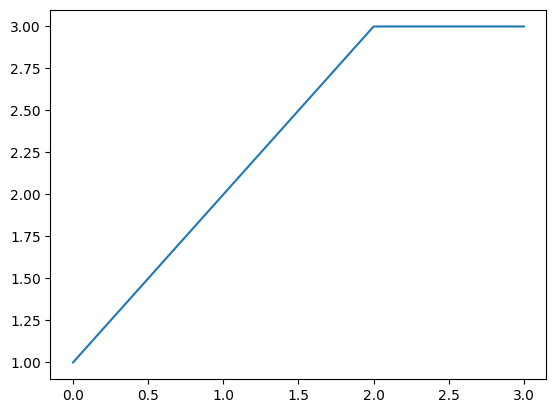

In [43]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
#matplotlib.use('pgf')
# matplotlib.rcParams.update({
#     "pgf.texsystem" :"pdflatex",
#     # "font.familiy": "serif",
#     "text.usetex": True,
#     "pgf.rcfonts": False
# })
fig,ax = plt.subplots()
ax.plot(np.array([1,2,3,3]))
fig.savefig("test.pgf", backend="pgf")
fig.show()

In [44]:
relevent_relations = get_relevant_relations(data, RDF_NUMBER_TYPES)


In [46]:
relevent_relations

[26, 2, 43]

In [45]:
relation = relevent_relations[1]

In [98]:
from torch import Tensor
from typing import List
c:List[Tensor] =children

In [ ]:
c:List[Torch] =children

In [101]:
relation

2

In [103]:
relevent_relations[1]

2

In [102]:
type(relevent_relations[1])

int

In [91]:
import torch
from preprocess.binning import encode_number_sublist 
triples = data.triples[data.triples[:,1]==relation]
parent = triples[:,0]
# s_list = [[triples[:,0].numpy()]] # list with subject for each level of tree
# df = pd.DataFrame(triples[:,0], columns=['s']) 
# ## add val column containing numerical values coresponding to the s base_relation o triple, then mapped according to i2e[o]
# df['val'] = df['s'].apply(lambda s: int(float(data.i2e[triples[triples[:,0]==s][0,2]][0])))
sub_df = encode_number_sublist(
            triples, data.i2e)
# df = data.triples
all_rels = data.triples[torch.isin(data.triples[:,0], triples[:,0])]
r, counts = torch.unique(all_rels[:,1], return_counts=True)
# r_counts = pd.DataFrame({'r':r.numpy(),'count':counts.numpy()}).sort_values('count',ascending=False).reset_index(drop=True)
# r_counts = r_counts[r_counts['r']!=relation] # here better logic is needed
r_cnt = torch.cat((r.view(-1, 1),counts.view(-1, 1)),dim = 1)
r_cnt = r_cnt[r_cnt[:,0]!= relation]
_,indices = torch.sort(r_cnt[:, 1],descending= True)
r_cnt = r_cnt[indices]
r_cnt = r_cnt[r_cnt[:,0]!= relation]
r_cnt

parent_reminder = parent.clone()
children = []
p = sub_df[torch.isin(sub_df[:,0],parent_reminder)][:,1] #visualization
qs = [] #visualization
for rels in r_cnt:
    print(f'processing {rels}')
    rv, counts = torch.unique(all_rels[all_rels[:,1]== rels[0]][:,2], return_counts=True)
    rv_cnt = torch.cat((rv.view(-1, 1),counts.view(-1, 1)),dim = 1)
    _,indices = torch.sort(rv_cnt[:, 1],descending= True)
    rv_cnt = rv_cnt[indices]

    max_prop = rv_cnt[0,1] / len(parent_reminder)
    min_prop = rv_cnt[-1,1] / len(parent_reminder)

    if max_prop < 0.001 or min_prop > 0.999:
        pass
    else:
        for rel_val in rv_cnt:
            if rel_val[1] / len(parent_reminder) < 0.001 :
                break

            pot_child = all_rels[(all_rels[:,1]==rels[0])&(torch.isin(all_rels[:,0],parent_reminder))&(all_rels[:,2]==rel_val[0])][:,0]
            # break
            p_dist = sub_df[torch.isin(sub_df[:,0],parent_reminder)][:,1]
            q_dist = sub_df[torch.isin(sub_df[:,0],pot_child)][:,1]
            proportion = len(pot_child)/len(parent_reminder)


            kl_div = adapted_kl_divergence(p_dist,q_dist)
            if proportion > 0.1 and proportion <0.9:
                print(f'j: {rels[0]} - prop: {proportion} - kl_div: {kl_div}')


        # proportion = len(pot_child)/len(parent_reminder)
        
            

            if proportion>0.98 or proportion <0.02:
                pass
            if kl_div<500:
                pass
    #     # #need to define value here
    #     elif kl_div<500:
    #         pass
            else:
                #print("was here")
                qs.append(q_dist) #visualization
                print("child added")
                children.append(pot_child)
                parent_reminder = parent_reminder[~torch.isin(parent_reminder, pot_child)]
    if len(children)>0:
        print("enough")
        break    
# qs.append(p_dist) #visualization
# children.append(parent_reminder)




processing tensor([   40, 47872])
processing tensor([   29, 19127])
processing tensor([   9, 9170])
processing tensor([   1, 8396])
child added
child added
child added
child added
child added
child added
child added
child added
enough


In [93]:
len(children)

8

In [82]:
rv_cnt[0,1] / len(parent_reminder)

tensor(0.0001)

In [88]:
len(children)

21

In [78]:
rv_cnt[0,1] 
rv_cnt[-1,1] 

tensor(1)

In [81]:
rv_cnt

tensor([[211086,      1],
        [211090,      1],
        [211091,      1],
        ...,
        [272078,      1],
        [272079,      1],
        [272080,      1]])

In [58]:
rv, counts = torch.unique(all_rels[all_rels[:,1]== r_cnt[3,0]][:,2], return_counts=True)
# r_counts = pd.DataFrame({'r':r.numpy(),'count':counts.numpy()}).sort_values('count',ascending=False).reset_index(drop=True)
# r_counts = r_counts[r_counts['r']!=relation] # here better logic is needed
rv_cnt = torch.cat((rv.view(-1, 1),counts.view(-1, 1)),dim = 1)
#rv_cnt = r_cnt[r_cnt[:,0]!= relation]
_,indices = torch.sort(rv_cnt[:, 1],descending= True)
rv_cnt = rv_cnt[indices]

In [72]:
rels = r_cnt[0]
rv, counts = torch.unique(all_rels[all_rels[:,1]== rels[0]][:,2], return_counts=True)
rv_cnt = torch.cat((rv.view(-1, 1),counts.view(-1, 1)),dim = 1)
_,indices = torch.sort(rv_cnt[:, 1],descending= True)
rv_cnt = rv_cnt[indices]
rel_val =rv_cnt[0]
print(rels)
print(rel_val)

tensor([   40, 47872])
tensor([211086,      1])


In [73]:
all_rels[(all_rels[:,1]==rels[0])&(torch.isin(all_rels[:,0],parent_reminder))&(all_rels[:,2]==rel_val[0])][:,0]

NameError: name 'parent_reminder' is not defined

In [59]:
rv_cnt

tensor([[196038,    350],
        [193659,    344],
        [196217,    327],
        ...,
        [199975,      1],
        [195423,      1],
        [198977,      1]])

In [51]:
all_rels [ all_rels[:,1]== r_cnt[0,0]]

tensor([[272082,     40, 224483],
        [272082,     40, 224484],
        [272082,     40, 224485],
        ...,
        [288872,     40, 220268],
        [288872,     40, 234341],
        [288872,     40, 234342]], dtype=torch.int32)

In [49]:
r_cnt[0,0]

tensor(40)

In [ ]:
all_rel_vals = data.triples[torch.isin(data.triples[:,0], triples[:,0])]
r, counts = torch.unique(all_rels[:,1], return_counts=True)
# r_counts = pd.DataFrame({'r':r.numpy(),'count':counts.numpy()}).sort_values('count',ascending=False).reset_index(drop=True)
# r_counts = r_counts[r_counts['r']!=relation] # here better logic is needed
r_cnt = torch.cat((r.view(-1, 1),counts.view(-1, 1)),dim = 1)
r_cnt = r_cnt[r_cnt[:,0]!= relation]
_,indices = torch.sort(r_cnt[:, 1],descending= True)
r_cnt = r_cnt[indices]

In [39]:
import torch
from preprocess.binning import encode_number_sublist 
triples = data.triples[data.triples[:,1]==relation]
parent = triples[:,0]
# s_list = [[triples[:,0].numpy()]] # list with subject for each level of tree
# df = pd.DataFrame(triples[:,0], columns=['s']) 
# ## add val column containing numerical values coresponding to the s base_relation o triple, then mapped according to i2e[o]
# df['val'] = df['s'].apply(lambda s: int(float(data.i2e[triples[triples[:,0]==s][0,2]][0])))
sub_df = encode_number_sublist(
            triples, data.i2e)
# df = data.triples
all_rels = data.triples[torch.isin(data.triples[:,0], triples[:,0])]
r, counts = torch.unique(all_rels[:,1], return_counts=True)
# r_counts = pd.DataFrame({'r':r.numpy(),'count':counts.numpy()}).sort_values('count',ascending=False).reset_index(drop=True)
# r_counts = r_counts[r_counts['r']!=relation] # here better logic is needed
r_cnt = torch.cat((r.view(-1, 1),counts.view(-1, 1)),dim = 1)
r_cnt = r_cnt[r_cnt[:,0]!= relation]
_,indices = torch.sort(r_cnt[:, 1],descending= True)
r_cnt = r_cnt[indices]
# r_cnt = r_cnt[r_cnt[:,0]!= relation]
# r_cnt

parent_reminder = parent.clone()
children = []
p = sub_df[torch.isin(sub_df[:,0],parent_reminder)][:,1] #visualization
qs = [] #visualization
for rels in r_cnt:
    pot_child = all_rels[(all_rels[:,1]==rels[0])&(torch.isin(all_rels[:,0],parent_reminder))][:,0]

    p_dist = sub_df[torch.isin(sub_df[:,0],parent_reminder)][:,1]
    q_dist = sub_df[torch.isin(sub_df[:,0],pot_child)][:,1]
    kl_div = adapted_kl_divergence(p_dist,q_dist)

    proportion = len(pot_child)/len(parent_reminder)
    
    print(f'j: {rels[0]} - prop: {proportion} - kl_div: {kl_div}')

    if proportion>0.98 or proportion <0.02:
        pass
    # #need to define value here
    elif kl_div<500:
        pass
    else:
        #print("was here")
        qs.append(q_dist) #visualization
        print("child added")
        children.append(pot_child)
        parent_reminder = parent_reminder[~torch.isin(parent_reminder, pot_child)]
qs.append(p_dist) #visualization
children.append(parent_reminder)




j: 30 - prop: 1.0 - kl_div: 0.0
j: 17 - prop: 0.9862484694358105 - kl_div: 24892.65142
j: 16 - prop: 0.9703306018649336 - kl_div: 34002.97273
child added
j: 18 - prop: 0.3238095238095238 - kl_div: 428.2661
j: 14 - prop: 0.4095238095238095 - kl_div: 540.46285
child added
j: 13 - prop: 0.0 - kl_div: 0.0


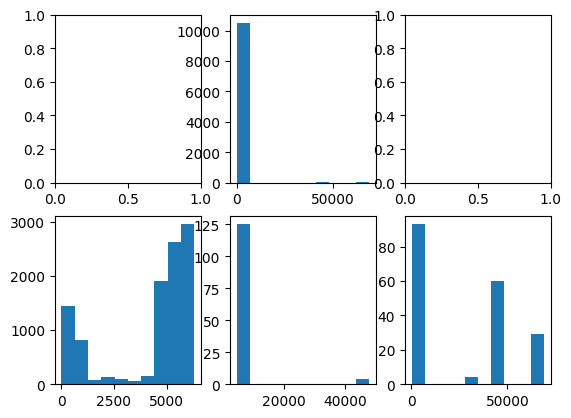

In [40]:
fig, axis = plt.subplots(2, len(childs))
for i in range(2):
    for j in range(len(childs)):
        if i == 0 and j == len(childs)//2:
            axis[i,j].hist(p)
        elif i ==0:
            pass
        else:
            axis[i,j].hist(qs[j])

In [41]:

if f'{URI_PREFIX}predicat#prevBin' not in data.r2i:
    p = f'{URI_PREFIX}predicat#prevBin'
    new_id = len(data.i2r)
    data.r2i[p] = new_id
    data.i2r.append(p)
    data.num_relations += 1

    p = f'{URI_PREFIX}predicat#nextBin'
    new_id = len(data.i2r)
    data.r2i[p] = new_id
    data.i2r.append(p)
    data.num_relations += 1

# for r in relevent_relations:
#     p = f'{URI_PREFIX}predicat#binning{r}'
#     new_id = len(data.i2r)
#     data.r2i[p] = new_id
#     data.i2r.append(p)
#     data.num_relations += 1

In [53]:
num_bins = 10
from utils import add_triple
from sklearn.neighbors import LocalOutlierFactor
use_lof = True

In [54]:
for i in range(len(children)):
    augmented_df = data.triples.clone()
    augmented_df = augmented_df[(augmented_df[:, 1] == relation) & (torch.isin(augmented_df[:,0],children[i]))]
    sub_df = encode_number_sublist(
        augmented_df, data.i2e)

    p = f'{URI_PREFIX}predicat#binning{relation}-{i}'
    new_id = len(data.i2r)
    data.r2i[p] = new_id
    data.i2r.append(p)
    data.num_relations += 1

    for b in range(num_bins):
        o = (f'{URI_PREFIX}entity#bin{b+1}-relation{relation}-child{i}',
                f'{URI_PREFIX}datatype#bin')
        new_id = len(data.i2e)
        data.e2i[o] = new_id
        data.i2e.append(o)
        data.num_entities += 1
        if b >0:
            po = (f'{URI_PREFIX}entity#bin{b}-relation{relation}-child{i}',
                f'{URI_PREFIX}datatype#bin')
            data = add_triple(data, o, f'{URI_PREFIX}predicat#prevBin', po)
            data = add_triple(data, po, f'{URI_PREFIX}predicat#nextBin', o)
    
    if (use_lof):
        lof = LocalOutlierFactor(n_neighbors=200)
        lof.fit(sub_df[:, 1].to(torch.int).reshape(-1, 1))
        outlier_scores = lof.negative_outlier_factor_
        # Create a new column in the numpy array to store the outlier scores
        # tensor_np = torch.hstack((encoded_df, outlier_scores.reshape(-1,1)))
        threshold = np.percentile(outlier_scores, 5)
        # use the outlier scores to filter out the outliers from the numpy array
        outliers = sub_df[(outlier_scores <= threshold)
                            & (outlier_scores < -1)]
        sub_df = sub_df[(outlier_scores > threshold)
                        | (outlier_scores >= -1)]
        outlier_df = augmented_df[(outlier_scores <= threshold) & (
            outlier_scores < -1)].clone()
        augmented_df = augmented_df[(
            outlier_scores > threshold) | (outlier_scores >= -1)]
        if len(outliers) > 0:

            data.i2r.append(
                f'{URI_PREFIX}predicat#outlier-{relation}')
            data.r2i[f'{URI_PREFIX}predicat#outlier-{relation}'] = data.num_relations

            data.i2e.append(
                (f'{URI_PREFIX}entitys#outlier-{relation}', f'{URI_PREFIX}outlier'))
            data.e2i[(f'{URI_PREFIX}entitys#outlier-{relation}',
                        f'{URI_PREFIX}outlier')] = data.num_entities

            data.num_relations += 1
            data.num_entities += 1

            object_mapping = np.vectorize(lambda t: data.e2i[(
                f'{URI_PREFIX}entitys#outlier-{relation}', f'{URI_PREFIX}outlier')])

            predicat_mapping = np.vectorize(
                lambda t: data.r2i[f'{URI_PREFIX}predicat#outlier-{relation}'])

            outlier_df[:, 1] = torch.tensor(
                np.array([predicat_mapping(outliers[:, 0])]), dtype=torch.int32)
            outlier_df[:, 2] = torch.tensor(
                np.array([object_mapping(outliers[:, 0])]), dtype=torch.int32)
            data.triples = torch.cat((data.triples, outlier_df), 0)

    sub_df = torch.cat(  # put bins and sub_df together
    (sub_df, torch.from_numpy(  # get numpy solutions back
        np.digitize(  # assign for each value in sub_df the corresponding bin
            sub_df[:, 1], np.histogram(  # calculate n bins based on values in sub_df
                sub_df[:, 1], num_bins)[1][:-1]
        )
    ).reshape(-1, 1)  # transfrom x tensor into (x,1) tensor to fit (x,2) shape of sub_df
    ), 1)


    object_mapping = np.vectorize(lambda t: data.e2i[(f'{URI_PREFIX}entity#bin{int(t)}-relation{relation}-child{i}',
                f'{URI_PREFIX}datatype#bin')])

    predicat_mapping = np.vectorize(
        lambda t: data.r2i[f'{URI_PREFIX}predicat#binning{relation}-{i}'])

    augmented_df[:, 1] = torch.tensor(
        np.array([predicat_mapping(sub_df[:, 2])]), dtype=torch.int32)
    augmented_df[:, 2] = torch.tensor(
        np.array([object_mapping(sub_df[:, 2])]), dtype=torch.int32)
    data.triples = torch.cat((data.triples, augmented_df), 0)






c:\Users\Noctris\.virtualenvs\rdf-literal-preprocessing-20b3_M0v\lib\site-packages\sklearn\neighbors\_lof.py:282: UserWarning: n_neighbors (200) is greater than the total number of samples (129). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(
c:\Users\Noctris\.virtualenvs\rdf-literal-preprocessing-20b3_M0v\lib\site-packages\sklearn\neighbors\_lof.py:282: UserWarning: n_neighbors (200) is greater than the total number of samples (186). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(


In [56]:
data.i2r[-30:]

['http://purl.org/collections/nl/am/productionDateEnd',
 'http://purl.org/collections/nl/am/productionDateStart',
 'http://purl.org/collections/nl/am/reproductionFormat',
 'http://purl.org/collections/nl/am/termType',
 'http://purl.org/collections/nl/am/title',
 'http://purl.org/collections/nl/am/wasPresentAt',
 'http://www.europeana.eu/schemas/edm/object',
 'http://www.openarchives.org/ore/terms/proxyFor',
 'http://www.openarchives.org/ore/terms/proxyIn',
 'http://www.w3.org/1999/02/22-rdf-syntax-ns#type',
 'http://www.w3.org/1999/02/22-rdf-syntax-ns#value',
 'http://www.w3.org/2004/02/skos/core#broader',
 'http://multimodal-knowledge-graph-augmentation.com/predicat#prevBin',
 'http://multimodal-knowledge-graph-augmentation.com/predicat#nextBin',
 'http://multimodal-knowledge-graph-augmentation.com/predicat#binning11',
 'http://multimodal-knowledge-graph-augmentation.com/predicat#binning15',
 'http://multimodal-knowledge-graph-augmentation.com/predicat#binning11',
 'http://multimodal-

In [58]:
data.r2i["http://multimodal-knowledge-graph-augmentation.com/predicat#outlier-15"]

50

In [69]:
data.i2e[16240]

('47999', 'http://www.w3.org/2001/XMLSchema#positiveInteger')

In [67]:
data.triples[(data.triples[:,1]==15)&(data.triples[:,0]==317800)]

tensor([[317800,     15,  16240]], dtype=torch.int32)

In [13]:
data.triples[data.triples[:,1]==43]

tensor([[272102,     43,   3406],
        [272394,     43,   2701],
        [272516,     43,   2867],
        ...,
        [288824,     43,   2772],
        [288858,     43,   3248],
        [288866,     43,   2994]], dtype=torch.int32)

In [14]:
data.i2r[43]

'https://data.labs.pdok.nl/rce/def/bouwjaar'

In [ ]:
for j in range(len(r_counts)):
    #c_triples = triples[(triples[:,1] == base_relation) & torch.isin(triples[:,0], child_reminder )]

    potential_child = triples[(triples[:,1] == relation) & (torch.isin(triples[:,0], triples[triples[:,1] == r_counts.iloc[j].r][:,0])) & (torch.isin(triples[:,0], c_triples[:,0]))]
    proportion = len(sub_triples)/len(parent)
    kl_div = adapted_kl_divergence(df[df.s.isin(c_triples[:,0].numpy())], df[df.s.isin(sub_triples[:,0].numpy())])
    
    print(f'j: {j} - prop: {proportion} - kl_div: {kl_div}')

    if proportion>0.95 or proportion <0.05:
        pass
    #need to define value here
    elif kl_div<300:
        pass
    else:
        #print("was here")
        # print("added")
        sub_s_list.append(sub_triples[:,0].numpy())
        c_triples = c_triples[~torch.isin(c_triples[:,0],sub_triples[:,0])]

sub_s_list.append(c_triples[:,0].numpy())
if len(sub_s_list) >1:
    s_list.append(sub_s_list)